In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from collections import Counter

In [ ]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import pos_tag

In [ ]:
from nltk.tokenize import sent_tokenize , word_tokenize

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def customFilter(text):
    # Handling the html tags
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # removing the digits
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
df['cleaned_text'] = df['review'].apply(customFilter)
df['cleaned_text'].head()

,cleaned_text
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [ ]:
df['cleaned_text']

,cleaned_text
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,im going to have to disagree with the previous...


In [ ]:
# # Create a new DataFrame with just the original and cleaned columns
# df_cleaned_only = df[['review', 'cleaned_text']]

# # Save to CSV (for checking only)
# df_cleaned_only.to_csv('/content/IMDB_Cleaned_Text_Only.csv', index=False)

# # Display first few rows
# df_cleaned_only.head()


Finding words for custom stopwords

In [ ]:
# creating a copy of df for finding custom stopwords
df_stemming = df.copy()

In [ ]:
all_words = ' '.join(df_stemming['cleaned_text']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(50))

[('the', 650783), ('and', 319427), ('a', 319254), ('of', 288081), ('to', 266296), ('is', 210068), ('in', 183149), ('it', 151361), ('i', 145575), ('this', 145500), ('that', 135805), ('was', 95187), ('as', 90060), ('with', 86554), ('for', 86149), ('movie', 83575), ('but', 80334), ('film', 74513), ('on', 66308), ('not', 59512), ('you', 59169), ('are', 58161), ('his', 57202), ('have', 55020), ('be', 52714), ('he', 51782), ('one', 50391), ('its', 47802), ('at', 46166), ('all', 44517), ('by', 43932), ('an', 42657), ('they', 41346), ('who', 40122), ('from', 40082), ('like', 38833), ('so', 38562), ('or', 34908), ('just', 34681), ('her', 34213), ('about', 33848), ('has', 32883), ('out', 32714), ('if', 31947), ('some', 30643), ('what', 29442), ('there', 29166), ('good', 28502), ('more', 27637), ('very', 27486)]


In [ ]:
stopwords = set(stopwords.words('english'))

# These are domian specific (movie-related)
custom_words = {
    'movie', 'film', 'one', 'make', 'like', 'watch', 'see', 'story', 'character',
    'director', 'scene', 'something', 'really', 'lot', 'plot', 'thing', 'could', 'would',
    'actor', 'actress', 'performance', 'hollywood', 'script', 'go', 'way',
    'good', 'just', 'get', 'even', 'much', 'well', 'also', 'still', 'bit', 'best',
    'worst', 'nothing', 'bad', 'great', 'maybe', 'never', 'thought', 'people', 'doesn',
    'don', 'didn', 'isn', 'wasn', 'aren', 'weren', 'shan', 'won', 'hav', 'hasn', 'hadn'
}


CustomStopwords = stopwords.union(custom_words)

In [ ]:
# custom function
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered = [word for word in tokens if word not in CustomStopwords]
    return ' '.join(filtered)

df['no_stopwords'] = df['cleaned_text'].apply(remove_stopwords)
df['no_stopwords'].head()

,no_stopwords
0,reviewers mentioned watching oz episode youll ...
1,wonderful little production filming technique ...
2,wonderful spend time hot summer weekend sittin...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...


In [ ]:
df_porter = df.copy()
df_snowball = df.copy()
df_wordNet = df.copy()

Porter Stemming


In [ ]:
porter = PorterStemmer()

In [ ]:
def porter_stemming(text):
    tokens = nltk.word_tokenize(text)
    stemmed = [porter.stem(word) for word in tokens]
    return ' '.join(stemmed)

df_porter['stemmed_text'] = df_porter['no_stopwords'].apply(porter_stemming)

In [ ]:
df_porter['stemmed_text']

,stemmed_text
0,review mention watch oz episod youll hook righ...
1,wonder littl product film techniqu unassum old...
2,wonder spend time hot summer weekend sit air c...
3,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun mr m...
...,...
49995,right job wasnt creativ origin first expect wh...
49996,dialogu act idiot direct annoy porn groov soun...
49997,cathol taught parochi elementari school nun ta...
49998,im go disagre previou comment side maltin seco...


Snowball Stemmer

In [ ]:
snowball = SnowballStemmer('english')

In [ ]:
def snowball_stemming(text):
    tokens = nltk.word_tokenize(text)
    stemmed = [snowball.stem(word) for word in tokens]
    return ' '.join(stemmed)

df_snowball['stemmed_text'] = df_snowball['no_stopwords'].apply(snowball_stemming)

Lemmatization

In [ ]:
df_snowball['stemmed_text']

,stemmed_text
0,review mention watch oz episod youll hook righ...
1,wonder littl product film techniqu unassum old...
2,wonder spend time hot summer weekend sit air c...
3,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun mr m...
...,...
49995,right job wasnt creativ origin first expect wh...
49996,dialogu act idiot direct annoy porn groov soun...
49997,cathol taught parochi elementari school nun ta...
49998,im go disagre previous comment side maltin sec...


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]
    return ' '.join(lemmatized)

df_wordNet['lemmatized_text'] = df_wordNet['no_stopwords'].apply(lemmatize_text)

In [ ]:
df_wordNet['lemmatized_text']

,lemmatized_text
0,reviewer mention watch oz episode youll hook r...
1,wonderful little production film technique una...
2,wonderful spend time hot summer weekend sit ai...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stun m...
...,...
49995,right job wasnt creative original first expect...
49996,dialogue act idiotic direct annoy porn groove ...
49997,catholic teach parochial elementary school nun...
49998,im go disagree previous comment side maltin se...


Vocabulary sizes for each

In [ ]:
def get_vocab_size(text_series):
    words = ' '.join(text_series).split()
    return len(set(words))

print("Original (no_stopwords) vocab size:", get_vocab_size(df['no_stopwords']))
print("Porter stemmed vocab size:", get_vocab_size(df_porter['stemmed_text']))
print("Snowball stemmed vocab size:", get_vocab_size(df_snowball['stemmed_text']))
print("Lemmatized vocab size:", get_vocab_size(df_wordNet['lemmatized_text']))


Original (no_stopwords) vocab size: 215248
Porter stemmed vocab size: 175705
Snowball stemmed vocab size: 175037
Lemmatized vocab size: 204190


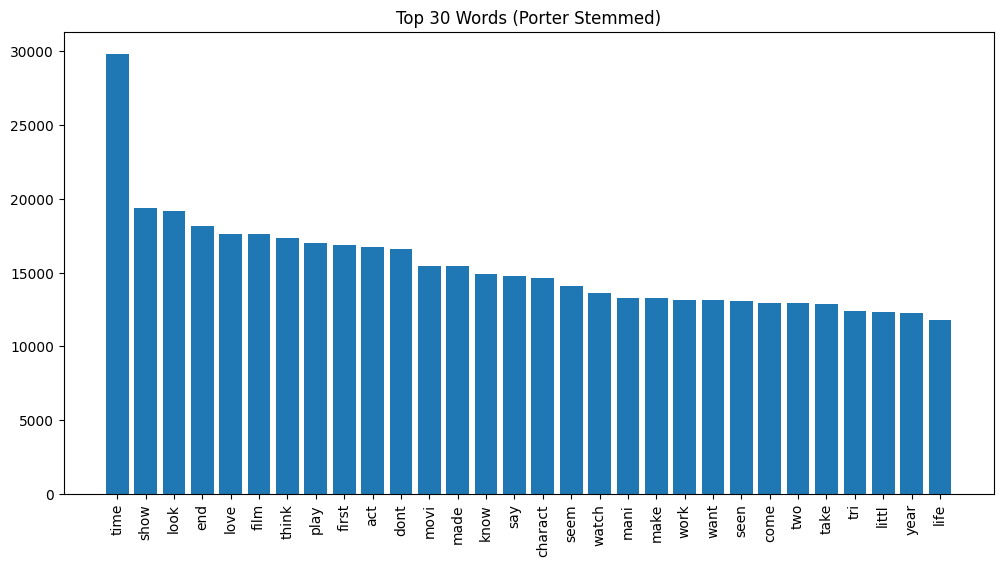

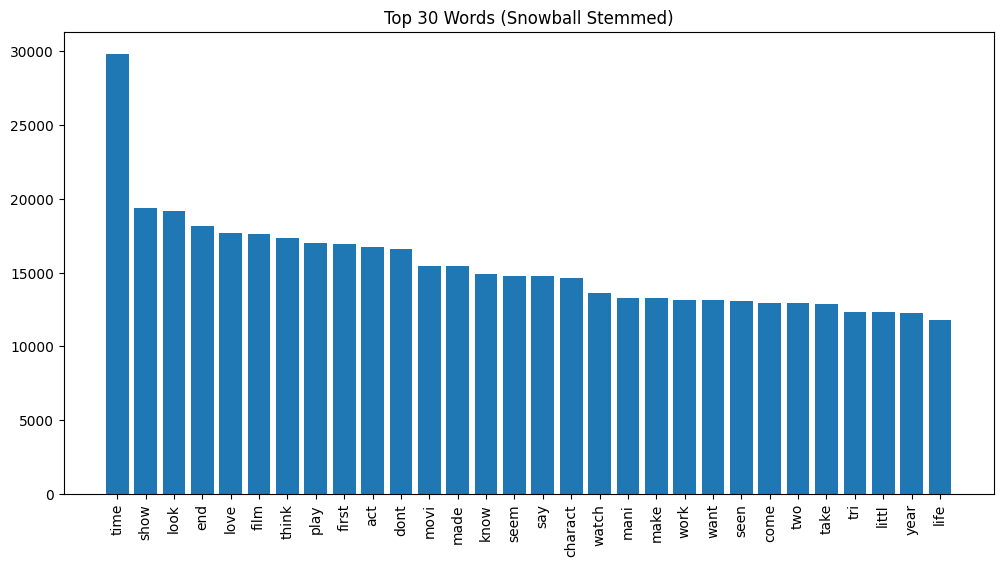

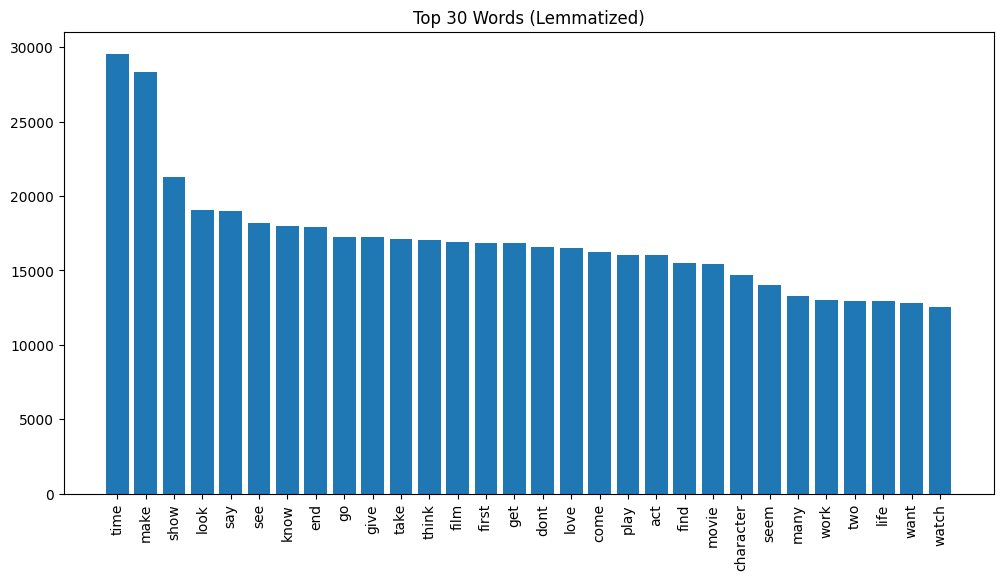

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(text_series, title):
    words = ' '.join(text_series).split()
    freq = Counter(words)
    common = freq.most_common(30)
    words, counts = zip(*common)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_top_words(df_porter['stemmed_text'], "Top 30 Words (Porter Stemmed)")
plot_top_words(df_snowball['stemmed_text'], "Top 30 Words (Snowball Stemmed)")
plot_top_words(df_wordNet['lemmatized_text'], "Top 30 Words (Lemmatized)")


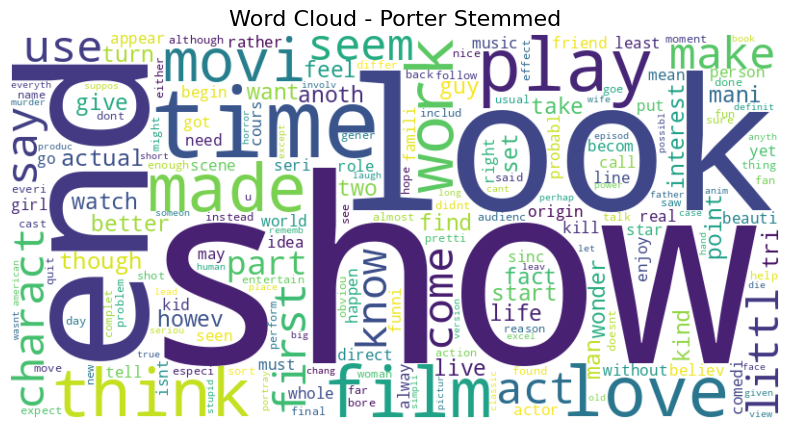

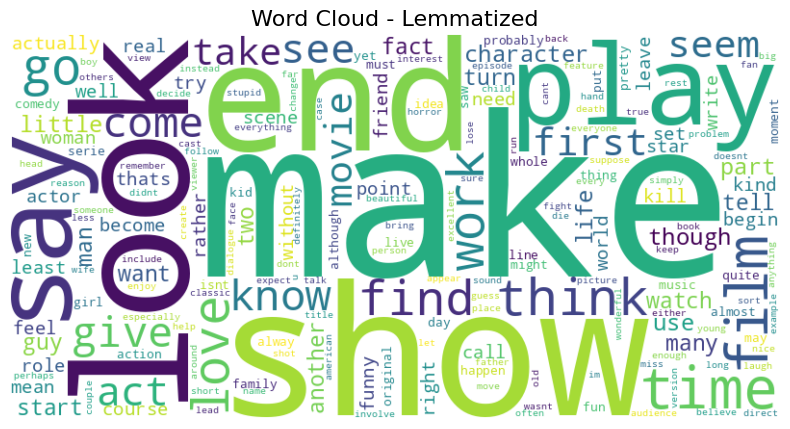

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(df_porter['stemmed_text'], "Word Cloud - Porter Stemmed")
generate_wordcloud(df_wordNet['lemmatized_text'], "Word Cloud - Lemmatized")
